### Table of Contents

* [Goals](#Goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
* [Exploratory Data Analysis](#EDA)
    * [Statistical Analysis](#section3_1)
    * [Correlational Analysis](#section3_2)
    * [Non-Linear Relationship Analysis](#section3_3)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>
This notebook presents an exploration of the students' academic performance dataset, which includes various factors influencing exam scores. The objectives of this analysis are:

* Gain a comprehensive understanding of the dataset and its structure
* Clean and prepare the data for detailed exploration
* Develop research questions based on observable patterns and trends within the dataset
* Investigate and analyze the data to uncover key correlations, relationships, and insights
* Use visualizations to highlight important trends in student performance across various factors such as attendance, study habits, and parental involvement

[**Quick View of Key Results (Tableau Dashboard)**](https://public.tableau.com/app/profile/apysarevskyi/viz/StudentsPerformanceAnalysis_17297658022780/Dashboard1?publish=yes)

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/datasets/lainguyn123/student-performance-factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

#### Loading the Data <a class="anchor" id="section1_1"></a>

First, the necessary libraries are imported into the notebook to facilitate data analysis. The `pandas` library is used to load the students' performance data from `students.csv`. The initial step involves previewing the first and last five rows of the DataFrame to understand its structure and content:


In [6]:
# Import python libraries for project goals
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy import stats

In [7]:
# Load dataset
students = pd.read_csv('StudentPerformanceFactors.csv')
# Display first and last five rows
students

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#### Data Information <a class="anchor" id="section1_2"></a>
Some immediate insights are:
* There are 20 columns and 6607 rows in total.
* The dataset contains both numerical and categorical columns. Out of 20 columns, 7 are numerical, and 13 are categorical.
* Column names follow a consistent format, which will facilitate the analysis, but it will still be helpful to convert them into lowercase format.
* There are a few columns with missing values:
  - `Teacher_Quality` has 78 missing values.
  - `Parental_Education_Level` has 90 missing values.
  - `Distance_from_Home` has 67 missing values.
* There are no duplicated rows in this dataset.

In [9]:
# Check the data types of each column
print(students.info())

# Summary statistics for numerical columns
print(students.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [10]:
# Check for duplicates
students.duplicated().sum()

0

In [11]:
# Check for missing values in each column
print(students.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Data Cleaning <a class="anchor" id="cleaning"></a>

After exploring the datasetit became clear that the following steps should be taken to prepare it for further analysis:sis.
* Drop rows containing null values to ensure a clean daaset.
* Transform column names to a consistent lowercase format for easier manipution.
tion.


In [13]:
# Drop rows with missing values
students = students.dropna(subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])
# Make sure there are no missing values
print(students.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [14]:
# Convert column names to lowercase format
students.columns = students.columns.str.lower()
# Check for results of data cleaning
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hours_studied               6378 non-null   int64 
 1   attendance                  6378 non-null   int64 
 2   parental_involvement        6378 non-null   object
 3   access_to_resources         6378 non-null   object
 4   extracurricular_activities  6378 non-null   object
 5   sleep_hours                 6378 non-null   int64 
 6   previous_scores             6378 non-null   int64 
 7   motivation_level            6378 non-null   object
 8   internet_access             6378 non-null   object
 9   tutoring_sessions           6378 non-null   int64 
 10  family_income               6378 non-null   object
 11  teacher_quality             6378 non-null   object
 12  school_type                 6378 non-null   object
 13  peer_influence              6378 non-null   object
 1

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>
Academic performance, particularly exam scores, is a major factor influencing students' success. Understanding how exam scores interact with various factors like study habits, attendance, and parental involvement can provide valuable insights into student performance. This analysis focuses on `exam_score` as the dependent variable and explores its relationships with both categorical and numerical independent factors.

The structure of EDA:
* Statistical Analysis of Exam Score
* Correlational Analysis of Exam Score
* Non-Linear Relationship Analysis

#### Statistical Analysis <a class="anchor" id="section3_1"></a>
This section focuses on the statistical analysis of `exam_score` in relation to categorical variables such as `gender`, `school_type`, and `parental_involvement`. Statistical tests like t-tests and ANOVA are used to determine if significant differences in exam scores exist across these categories..


ANOVA between parental_involvement and exam_score:
F-statistic: 80.46
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



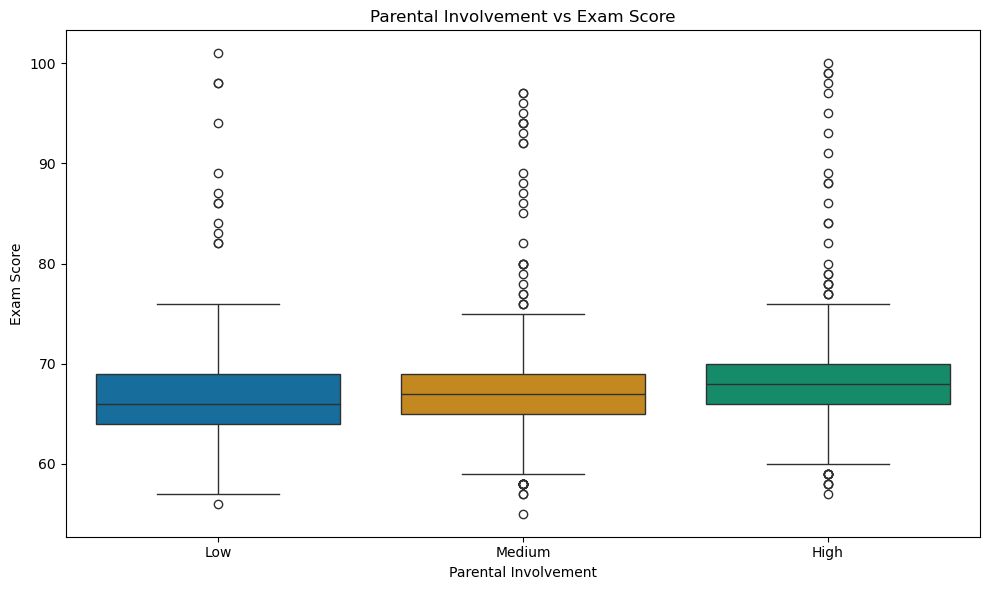

In [17]:
# Function to perform t-test or ANOVA for categorical vs numerical variables and plot boxplot
def cat_num_analysis(data, cat_var, num_var):
    # Check number of unique categories
    unique_categories = data[cat_var].nunique()

    # Perform t-test if two categories, ANOVA if more than two
    if unique_categories == 2:
        # Independent t-test
        # Grouping the data based on the categorical variable
        group1 = data[data[cat_var] == data[cat_var].unique()[0]][num_var]
        group2 = data[data[cat_var] == data[cat_var].unique()[1]][num_var]

        
        # Perform independent t-test
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"T-test between {cat_var} and {num_var}:")
        print(f"T-statistic: {t_stat:.2f}")
        print(f"p-value: {p_value:.4f}\n")
    else:
        # One-way ANOVA if more than two categories
        groups = [data[data[cat_var] == category][num_var].dropna() for category in data[cat_var].unique()]
        
        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"ANOVA between {cat_var} and {num_var}:")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"p-value: {p_value:.4f}\n")

    # Conclusion based on p-value
    if p_value < 0.05:
        print("There is a significant difference in the numerical variable across categories.\n")
    else:
        print("There is no significant difference in the numerical variable across categories.\n")

    # Boxplot visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y=num_var, data=data, hue = cat_var, palette="colorblind")

    # Format the title and labels
    plt.title(f'{cat_var.replace("_", " ").title()} vs {num_var.replace("_", " ").title()}')
    plt.xlabel(cat_var.replace('_', ' ').title())
    plt.ylabel(num_var.replace('_', ' ').title())

    # Show the plot
    plt.tight_layout()
    plt.show()

cat_num_analysis(students, 'parental_involvement', 'exam_score')

In the statistical analysis between `parental_involvement` and `exam_score`, the ANOVA test results show a **F-statistic of 80.46** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across the categories of parental involvement. The results clearly suggest that **parental involvement has a significant impact on exam performance**, with students who receive higher levels of involvement performing better on average.


ANOVA between access_to_resources and exam_score:
F-statistic: 92.42
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



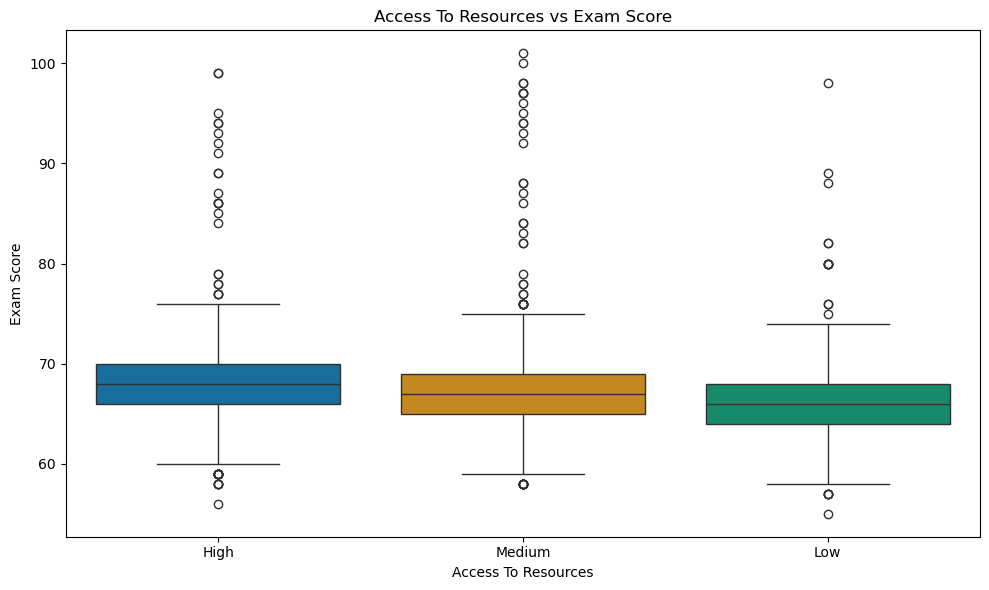

In [19]:
cat_num_analysis(students, 'access_to_resources', 'exam_score')

In the statistical analysis between `access_to_resources` and `exam_score`, the ANOVA test shows a **F-statistic of 92.42** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across the different levels of access to resources. The results suggest that **access to resources plays a crucial role in influencing exam performance**, with noticeable differences between the groups.

T-test between extracurricular_activities and exam_score:
T-statistic: -5.05
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



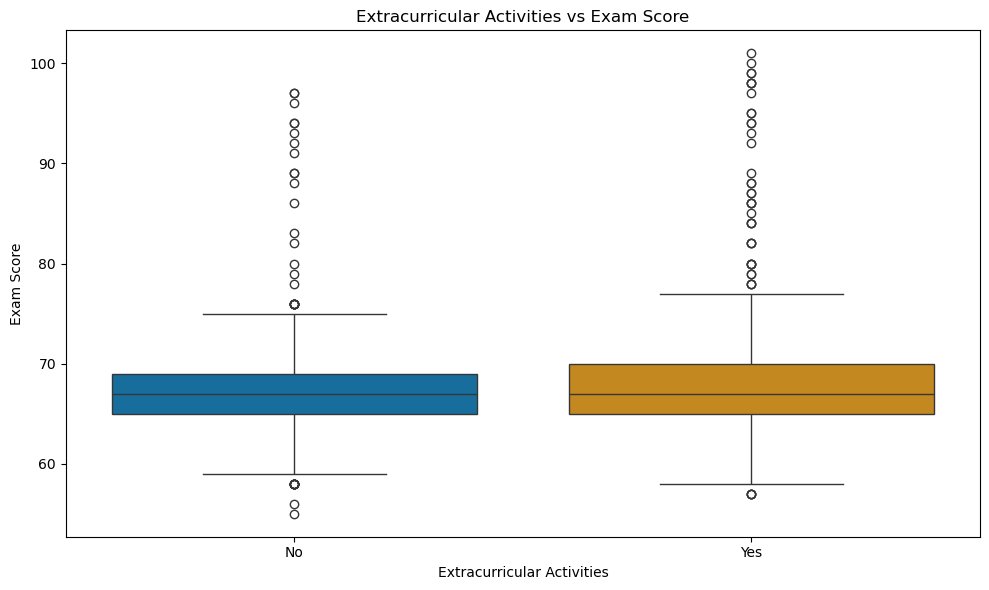

In [21]:
cat_num_analysis(students, 'extracurricular_activities', 'exam_score')

In the statistical analysis between `extracurricular_activities` and `exam_score`, the t-test results show a **T-statistic of -5.05** and a p-value less than 0.05, indicating a statistically significant difference in exam scores between students who participate in extracurricular activities and those who do not. The results suggest that **engagement in extracurricular activities significantly influences exam performance**, with a noticeable difference in scores.

ANOVA between motivation_level and exam_score:
F-statistic: 25.54
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



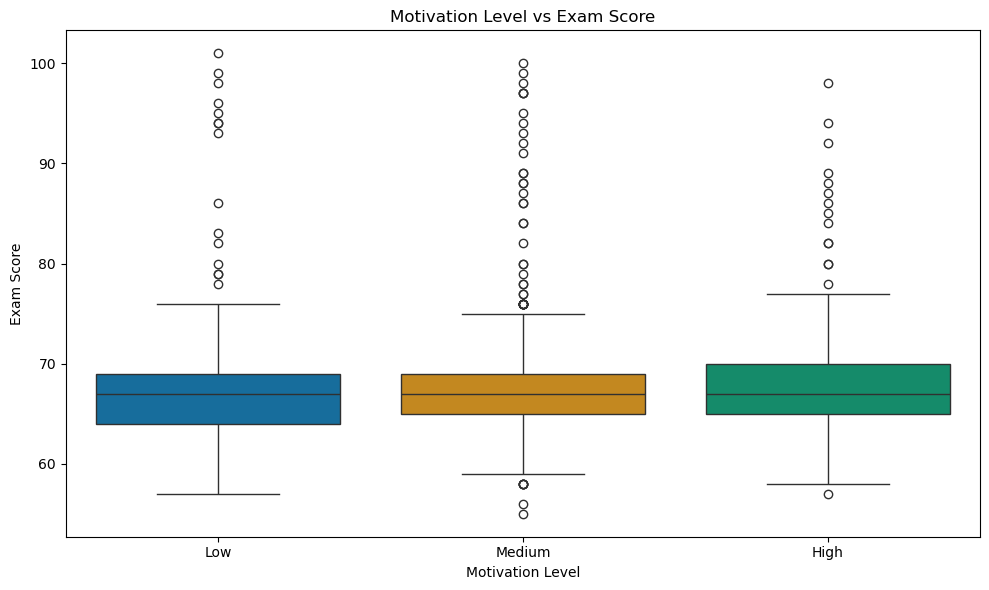

In [23]:
cat_num_analysis(students, 'motivation_level', 'exam_score')

In the statistical analysis between `motivation_level` and `exam_score`, the ANOVA test results show a **F-statistic of 25.54** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across the different levels of motivation. The results suggest that **motivation level significantly impacts exam performance**, with differences in exam scores observed across the categories.

T-test between internet_access and exam_score:
T-statistic: 4.09
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



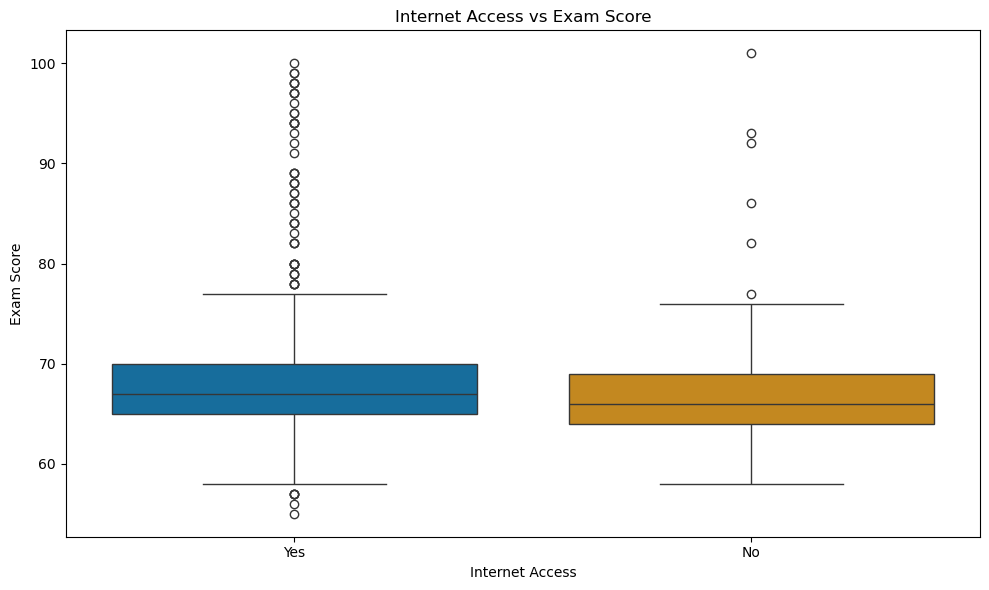

In [25]:
cat_num_analysis(students, 'internet_access', 'exam_score')

In the statistical analysis between `internet_access` and `exam_score`, the t-test results show a **T-statistic of 4.09** and a p-value less than 0.05, indicating a statistically significant difference in exam scores between students with and without internet access. The results suggest that **internet access significantly affects exam performance**, with a noticeable difference in scores between the two groups.

ANOVA between family_income and exam_score:
F-statistic: 28.78
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



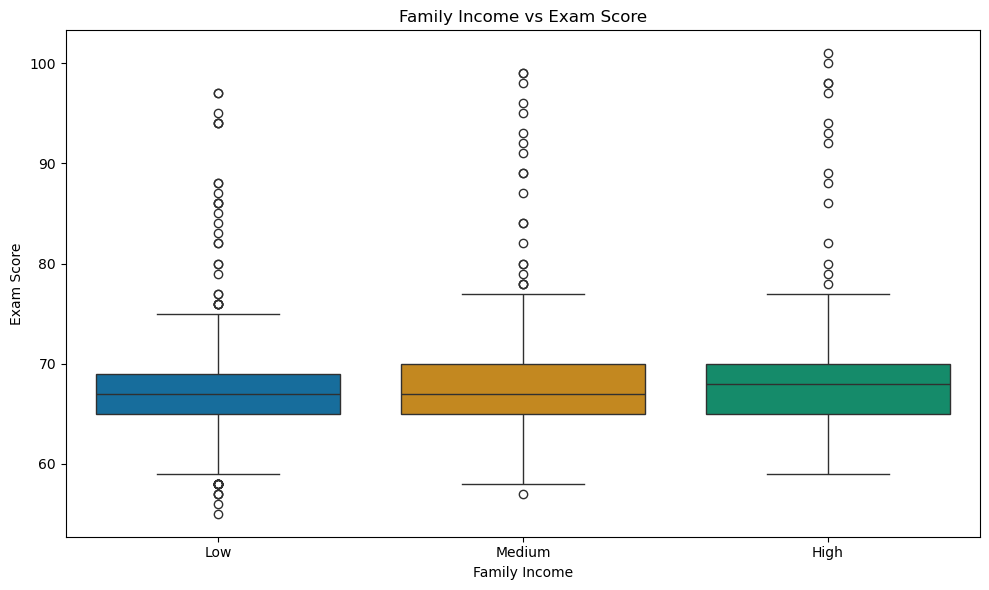

In [27]:
cat_num_analysis(students, 'family_income', 'exam_score')

In the statistical analysis between `family_income` and `exam_score`, the ANOVA test results show a **F-statistic of 28.78** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across different levels of family income. The results suggest that **family income significantly influences exam performance**, with variations in scores observed across the income levels.

ANOVA between teacher_quality and exam_score:
F-statistic: 18.60
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



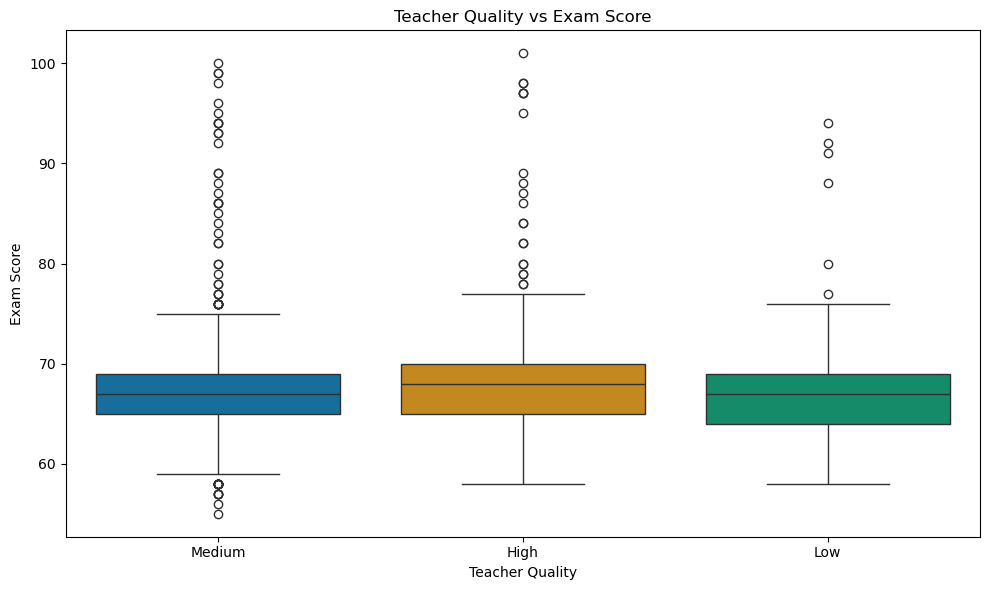

In [29]:
cat_num_analysis(students, 'teacher_quality', 'exam_score')

In the statistical analysis between `teacher_quality` and `exam_score`, the ANOVA test results show a **F-statistic of 18.60** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across different levels of teacher quality. The results suggest that **teacher quality has a significant influence on exam performance**, with variations in scores observed across the categories.

T-test between school_type and exam_score:
T-statistic: -0.87
p-value: 0.3855

There is no significant difference in the numerical variable across categories.



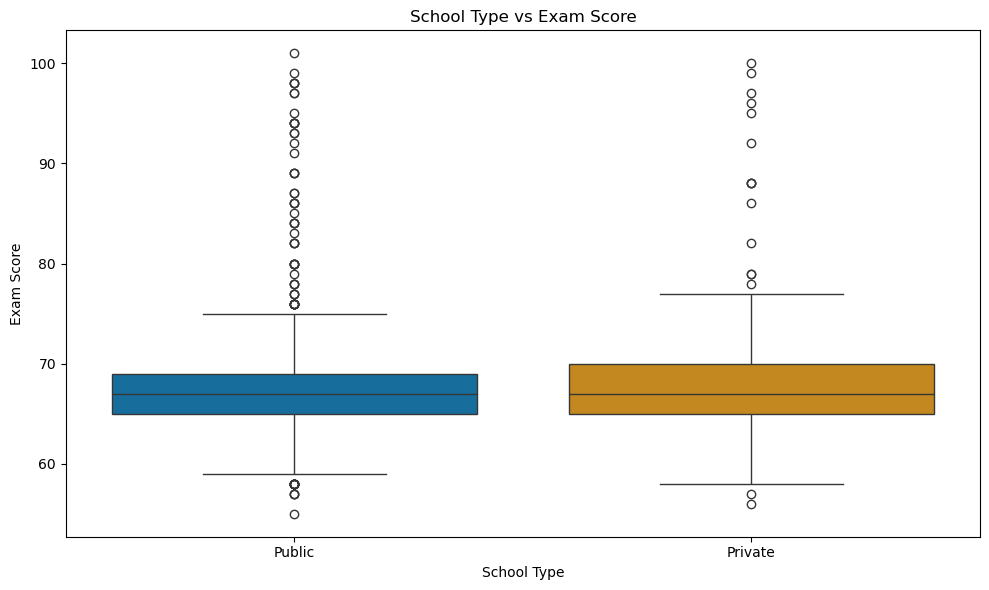

In [31]:
cat_num_analysis(students, 'school_type', 'exam_score')

In the statistical analysis between `school_type` and `exam_score`, the t-test results show a **T-statistic of -0.87** and a p-value greater than 0.05 (0.3855), indicating that there is **no statistically significant difference** in exam scores between students from public and private schools.

ANOVA between peer_influence and exam_score:
F-statistic: 32.18
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



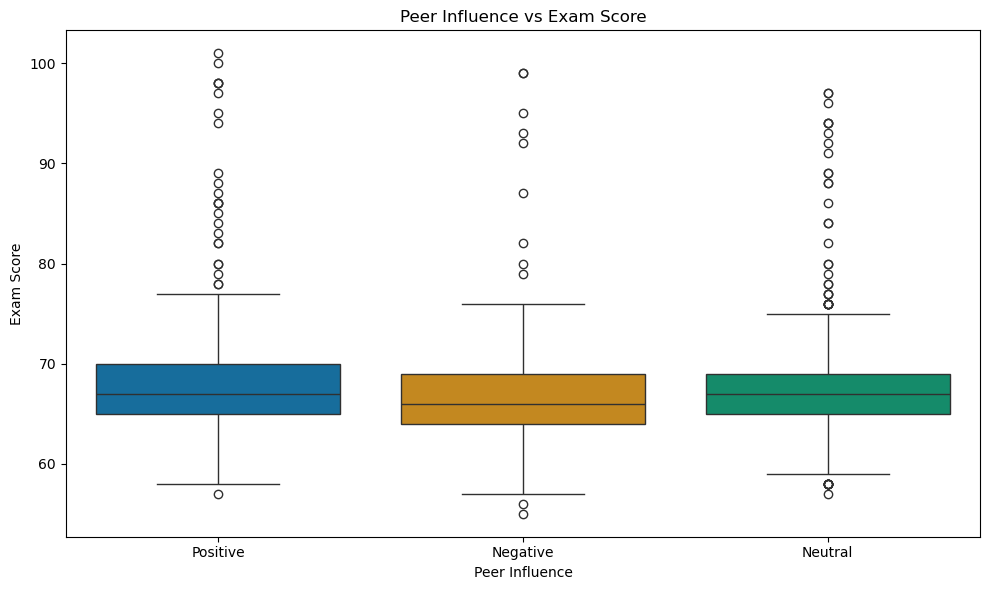

In [33]:
cat_num_analysis(students, 'peer_influence', 'exam_score')

In the statistical analysis between `peer_influence` and `exam_score`, the ANOVA test results show a **F-statistic of 32.18** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across the different categories of peer influence. The results suggest that **peer influence significantly impacts exam performance**, with variations in scores observed across the categories.

T-test between learning_disabilities and exam_score:
T-statistic: 6.72
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



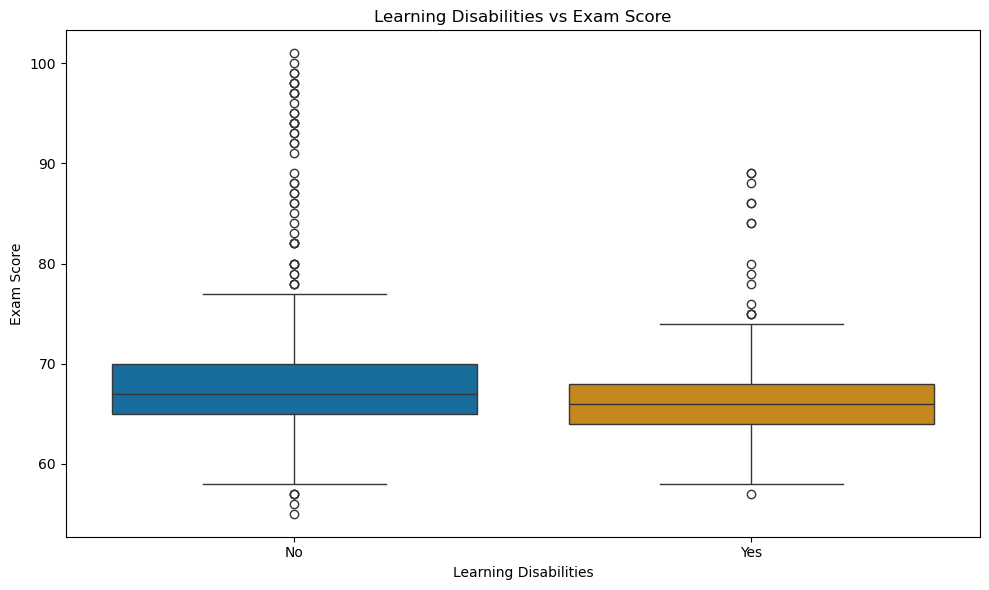

In [35]:
cat_num_analysis(students, 'learning_disabilities', 'exam_score')

In the statistical analysis between `learning_disabilities` and `exam_score`, the t-test results show a **T-statistic of 6.72** and a p-value less than 0.05, indicating a statistically significant difference in exam scores between students with and without learning disabilities. The results suggest that **learning disabilities significantly affect exam performance**, with a noticeable difference in scores between the two groups.

ANOVA between parental_education_level and exam_score:
F-statistic: 35.95
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



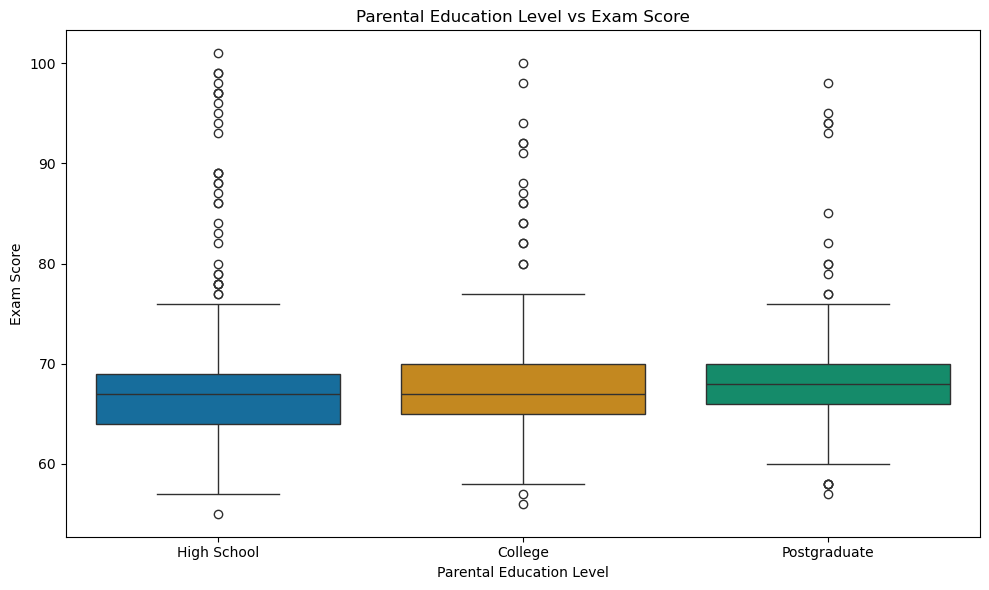

In [37]:
cat_num_analysis(students, 'parental_education_level', 'exam_score')

In the statistical analysis between `parental_education_level` and `exam_score`, the ANOVA test results show a **F-statistic of 35.95** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across the different levels of parental education. The results suggest that **parental education level significantly affects exam performance**, with differences in scores observed across the categories.

ANOVA between distance_from_home and exam_score:
F-statistic: 24.94
p-value: 0.0000

There is a significant difference in the numerical variable across categories.



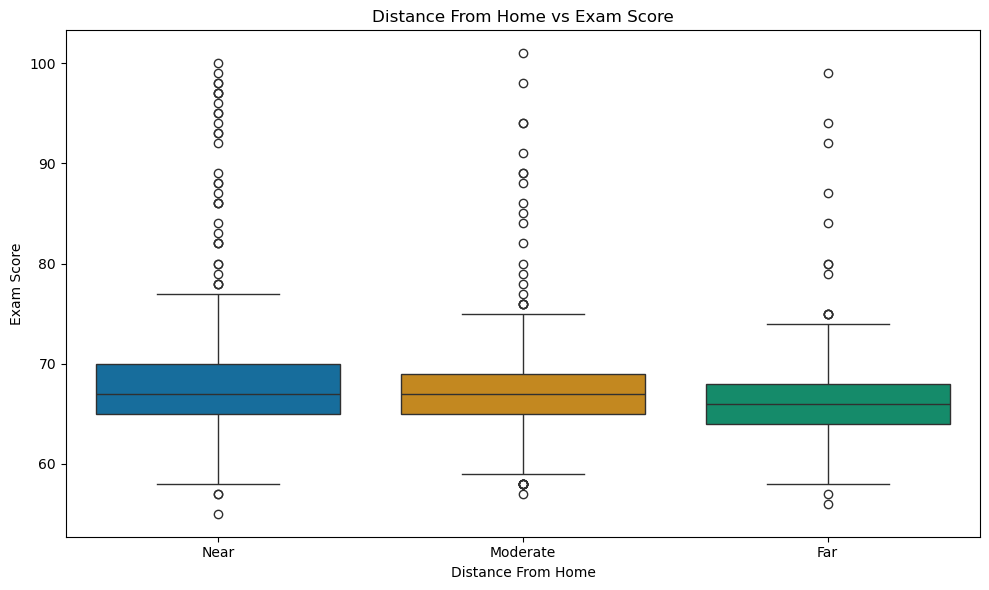

In [39]:
cat_num_analysis(students, 'distance_from_home', 'exam_score')

In the statistical analysis between `distance_from_home` and `exam_score`, the ANOVA test results show a **F-statistic of 24.94** and a p-value less than 0.05, indicating a statistically significant difference in exam scores across different distances from home. The results suggest that **distance from home significantly affects exam performance**, with differences in scores observed across the categories.

T-test between gender and exam_score:
T-statistic: -0.39
p-value: 0.6937

There is no significant difference in the numerical variable across categories.



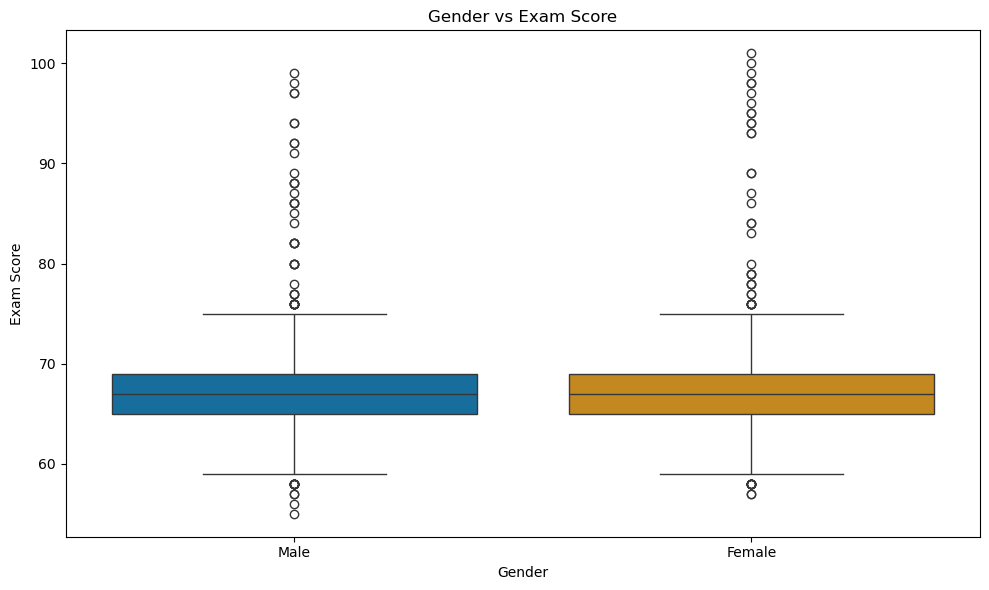

In [41]:
cat_num_analysis(students, 'gender', 'exam_score')

In the statistical analysis between `gender` and `exam_score`, the t-test results show a **T-statistic of -0.39** and a p-value greater than 0.05 (0.6937), indicating that there is **no statistically significant difference** in exam scores between male and female students.

#### Correlational Analysis <a class="anchor" id="section3_2"></a>
This section examines the correlations between `exam_score` and numerical variables such as `hours_studied`, `attendance`, and `previous_scores`. Pearson correlation coefficients are calculated to measure the strength and direction of the relationships between these variables.

Correlation between hours_studied and exam_score:
Pearson Correlation Coefficient: 0.45
p-value: 0.0000

The correlation is statistically significant.



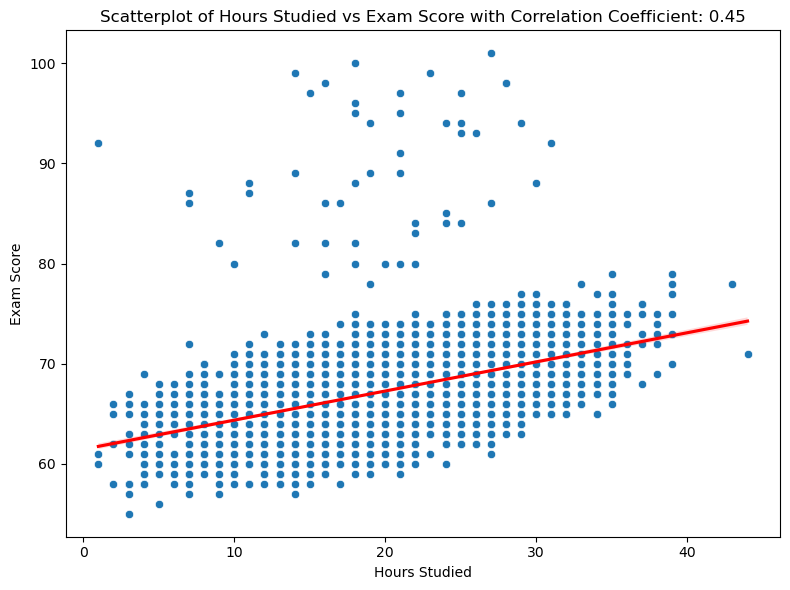

In [44]:
from scipy.stats import pearsonr

# Function to perform correlation analysis and plot scatterplot with correlation value
def corr_analysis(data, var1, var2):
    # Calculate Pearson correlation coefficient and p-value
    corr_coef, p_value = pearsonr(data[var1], data[var2])
    
    # Print the correlation coefficient and p-value
    print(f"Correlation between {var1} and {var2}:")
    print(f"Pearson Correlation Coefficient: {corr_coef:.2f}")
    print(f"p-value: {p_value:.4f}\n")
    
    # Interpretation of p-value
    if p_value < 0.05:
        print("The correlation is statistically significant.\n")
    else:
        print("The correlation is not statistically significant.\n")
    
    # Scatterplot visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var1, y=var2, data=data)
    
    # Plot a regression line to visualize the correlation
    sns.regplot(x=var1, y=var2, data=data, scatter=False, color='red')
    
    # Format the title and labels
    plt.title(f'Scatterplot of {var1.replace("_", " ").title()} vs {var2.replace("_", " ").title()} with Correlation Coefficient: {corr_coef:.2f}')
    plt.xlabel(var1.replace('_', ' ').title())
    plt.ylabel(var2.replace('_', ' ').title())
    
    # Show the plot
    plt.tight_layout()
    plt.show()

corr_analysis(students, 'hours_studied', 'exam_score')

In the correlational analysis between `hours_studied` and `exam_score`, the Pearson correlation coefficient is **0.45**, indicating a positive relationship between the two variables. The p-value is less than 0.05, showing that the correlation is statistically significant. This suggests that **as the number of hours studied increases, exam scores tend to improve**.

Correlation between attendance and exam_score:
Pearson Correlation Coefficient: 0.58
p-value: 0.0000

The correlation is statistically significant.



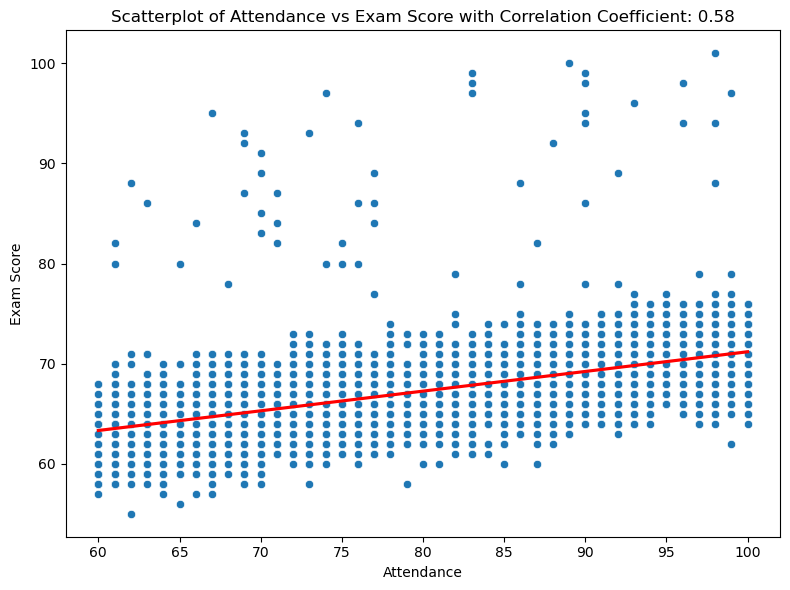

In [46]:
corr_analysis(students, 'attendance', 'exam_score')

In the correlational analysis between `attendance` and `exam_score`, the Pearson correlation coefficient is **0.58**, indicating a moderate positive relationship between the two variables. The p-value is less than 0.05, showing that the correlation is statistically significant. This suggests that **higher attendance is associated with better exam scores**.

Correlation between sleep_hours and exam_score:
Pearson Correlation Coefficient: -0.02
p-value: 0.1703

The correlation is not statistically significant.



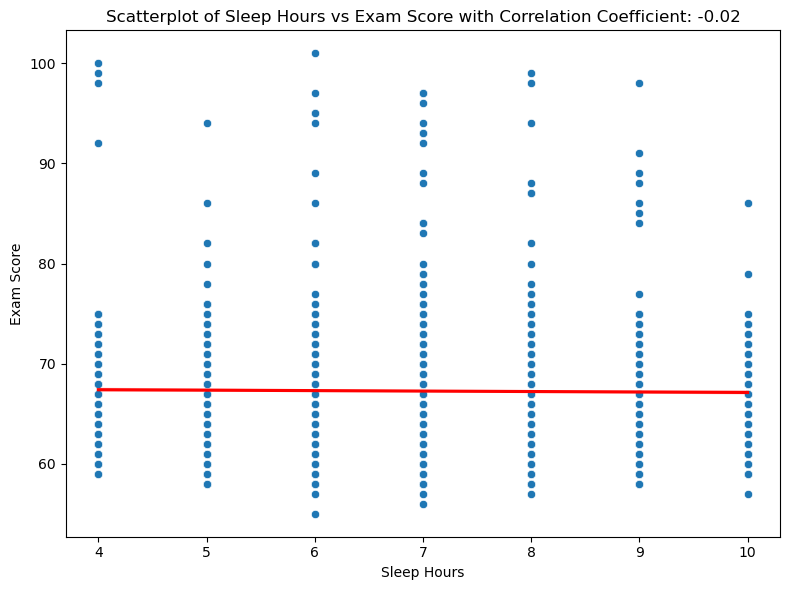

In [48]:
corr_analysis(students, 'sleep_hours', 'exam_score')

In the correlational analysis between `sleep_hours` and `exam_score`, the Pearson correlation coefficient is **-0.02**, indicating virtually no relationship between the two variables. The p-value is greater than 0.05 (0.1703), showing that the correlation is **not statistically significant**, suggesting that **sleep hours do not significantly influence exam scores**.

Correlation between previous_scores and exam_score:
Pearson Correlation Coefficient: 0.17
p-value: 0.0000

The correlation is statistically significant.



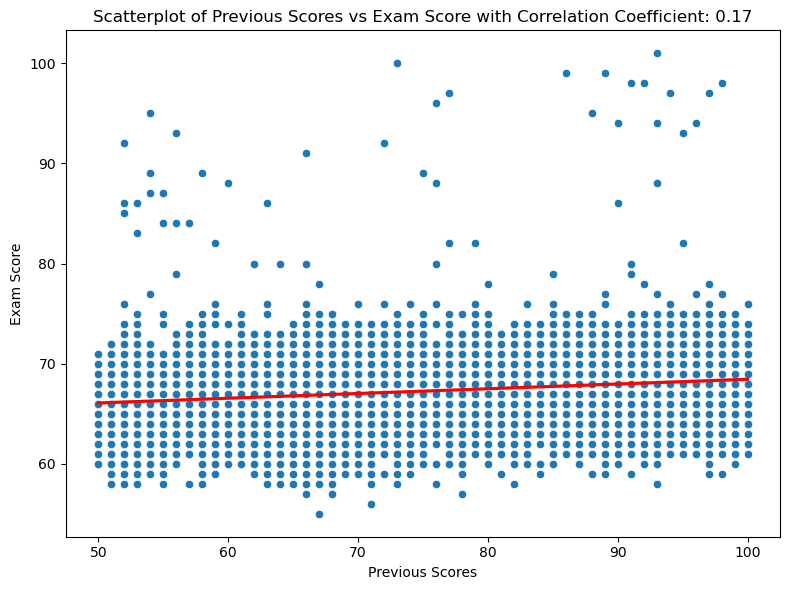

In [50]:
corr_analysis(students, 'previous_scores', 'exam_score')

In the correlational analysis between `previous_scores` and `exam_score`, the Pearson correlation coefficient is **0.17**, indicating a weak positive relationship between the two variables. The p-value is less than 0.05, showing that the correlation is statistically significant. This suggests that **higher previous scores are slightly associated with better exam performance**.

Correlation between tutoring_sessions and exam_score:
Pearson Correlation Coefficient: 0.16
p-value: 0.0000

The correlation is statistically significant.



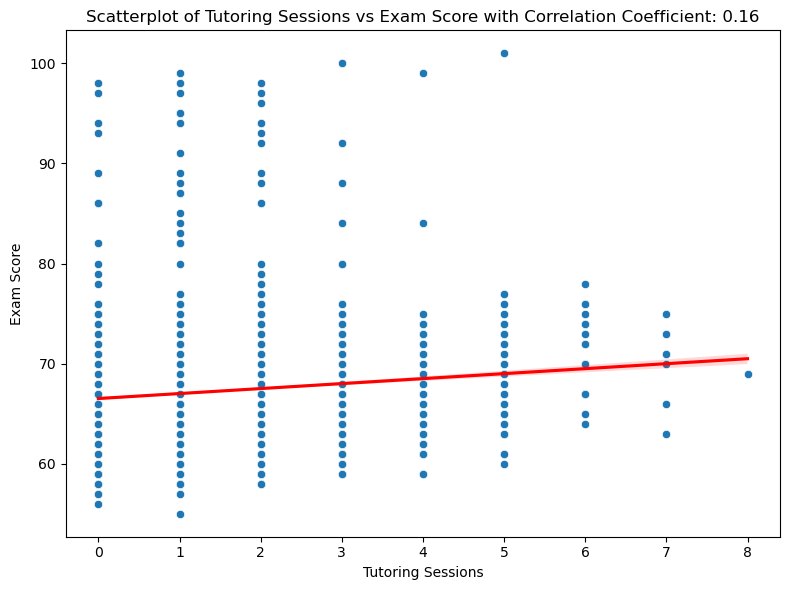

In [52]:
corr_analysis(students, 'tutoring_sessions', 'exam_score')

In the correlational analysis between `tutoring_sessions` and `exam_score`, the Pearson correlation coefficient is **0.16**, indicating a weak positive relationship between the two variables. The p-value is less than 0.05, showing that the correlation is statistically significant. This suggests that **participating in tutoring sessions is slightly associated with better exam performance**.

Correlation between physical_activity and exam_score:
Pearson Correlation Coefficient: 0.03
p-value: 0.0446

The correlation is statistically significant.



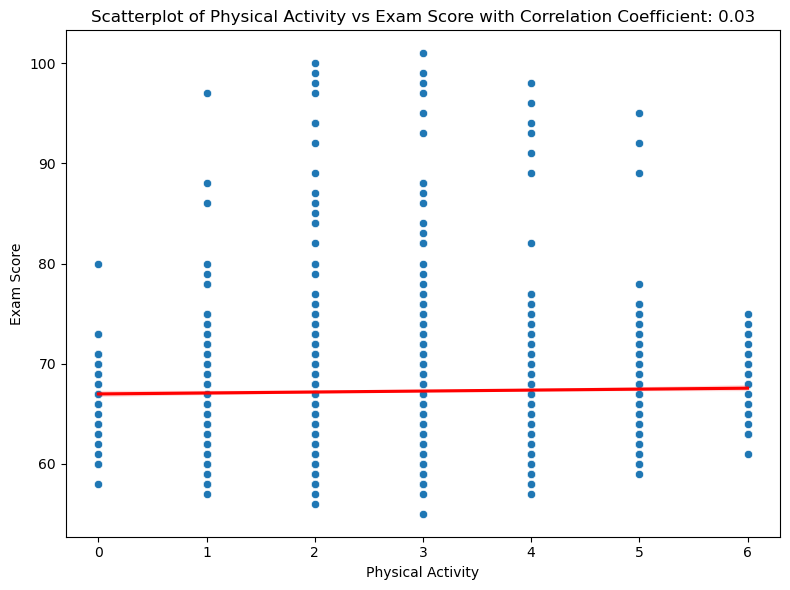

In [54]:
corr_analysis(students, 'physical_activity', 'exam_score')

In the correlational analysis between `physical_activity` and `exam_score`, the Pearson correlation coefficient is **0.03**, indicating a very weak positive relationship between the two variables. The p-value is less than 0.05, showing that the correlation is statistically significant. However, this weak correlation suggests that **physical activity has little to no association with exam performance**.

### Non-Linear Relationship Analysis <a class="anchor" id="section3_3"></a>
In some cases, the relationships between variables may not follow a simple linear pattern. This section investigates the possibility of non-linear relationships between `sleep_hours` and `exam_score`, as well as `physical_activity` and `exam_score`.

Non-linear relationships can be explored using polynomial transformations, which allow to model curves instead of straight lines. By transforming those variables and fitting polynomial regressions, it is possible to assess whether higher-order relationships exist.

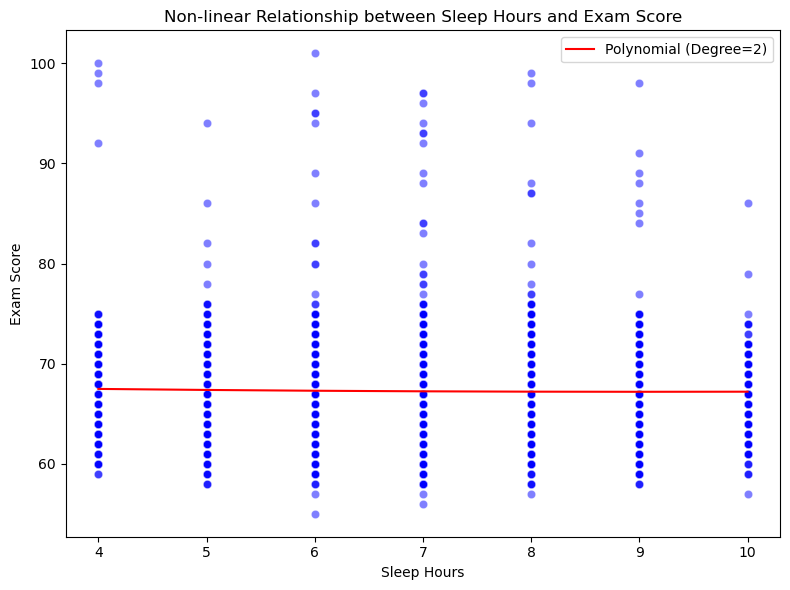

R-squared for sleep_hours and exam_score with degree 2: 0.0004


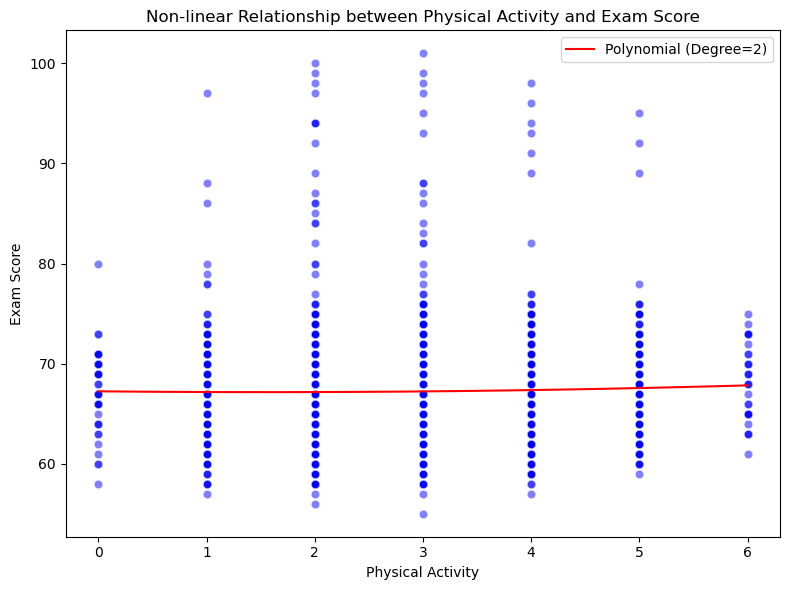

R-squared for physical_activity and exam_score with degree 2: 0.0008


In [57]:
# Import necessary libraries
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to check for non-linear relationships
def nonlinear(data, x_var, y_var, degree=2):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(data[[x_var]])
    
    # Fit a linear regression model with the polynomial features
    model = LinearRegression()
    model.fit(X_poly, data[y_var])
    
    # Create a DataFrame for the range of X values
    X_range = np.linspace(data[x_var].min(), data[x_var].max(), 500)
    X_range_df = pd.DataFrame(X_range, columns=[x_var])
    
    # Generate polynomial features for the range of X values
    X_range_poly = poly.transform(X_range_df)
    
    # Generate predictions for the polynomial fit
    y_pred = model.predict(X_range_poly)
    
    # Create a scatter plot of the original data
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_var, y=y_var, data=data, color='blue', alpha=0.5)
    
    # Plot the polynomial fit
    plt.plot(X_range, y_pred, color='red', label=f'Polynomial (Degree={degree})')
    
    # Label the plot
    plt.title(f'Non-linear Relationship between {x_var.replace("_", " ").title()} and {y_var.replace("_", " ").title()}')
    plt.xlabel(x_var.replace("_", " ").title())
    plt.ylabel(y_var.replace("_", " ").title())
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display the model's R-squared value
    r_squared = model.score(X_poly, data[y_var])
    print(f"R-squared for {x_var} and {y_var} with degree {degree}: {r_squared:.4f}")

nonlinear(students, 'sleep_hours', 'exam_score', degree=2)
nonlinear(students, 'physical_activity', 'exam_score', degree=2)

Two variables, `sleep_hours` and `physical_activity`, were explored for potential non-linear relationships with `exam_score`. Polynomial regression with a degree of 2 was applied to capture any non-linear trends in the data.

For the non-linear relationship between `sleep_hours` and `exam_score`, the R-squared value was 0.0004. Despite fitting a polynomial model, this very low R-squared value indicates that `sleep_hours` has almost no predictive power for `exam_score`, even when considering non-linear relationships. This suggests that there is no significant non-linear pattern between sleep and exam performance in this dataset.

Similarly, for the non-linear relationship between `physical_activity` and `exam_score`, the R-squared value was 0.0008. Once again, the very low R-squared value demonstrates that non-linear modeling fails to explain any meaningful variation in exam scores based on physical activity.

### Conclusion <a class="anchor" id="conclusion"></a>
**Findings Overview**
- **Parental Involvement, Access to Resources, and Motivation Level**: These factors show a significant relationship with exam scores. Higher levels of parental involvement, access to resources, and motivation are generally associated with better exam performance.
- **Extracurricular Activities and Tutoring Sessions**: Both factors exhibit a positive influence on exam scores, with students participating in extracurricular activities or attending tutoring sessions showing higher performance.
- **Internet Access and Family Income**: Students with internet access and higher family income also tend to perform better in exams, indicating the importance of socioeconomic factors in educational outcomes.
- **Peer Influence**: Positive peer influence correlates with higher exam scores, while negative or neutral influence results in lower performance.
- **Learning Disabilities**: There is a noticeable negative effect of learning disabilities on exam scores.
- **Non-significant Factors**: Gender, school type, and physical activity do not show significant correlations with exam performance. Non-linear relationships for sleep hours and physical activity were also found to be insignificant.

**Next Steps**
- **Further Exploration of Non-linear Patterns**: More advanced techniques or feature transformations may be explored to better capture non-linear relationships, especially for variables like sleep hours.
- **Feature Engineering**: Investigating interactions between categorical and numerical variables, such as how peer influence interacts with parental involvement, could reveal deeper insights.
- **Intervention Design**: Based on the significant factors, developing strategies to improve access to resources, parental involvement, and peer influence could enhance overall student performance.
- **Modeling and Prediction**: Build predictive models to estimate exam performance based on the most impactful factors like motivation level and access to resources.